In [1]:
import skimage as ski
import scipy
from skimage import morphology 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]



In [2]:
def rescale_image (image, proportion):
    return ski.img_as_ubyte(scipy.misc.imresize(image, proportion, interp ="bicubic"))

def rotate_image(image, degrees):
    return ski.img_as_ubyte(ski.transform.rotate(image, degrees, resize=True, mode='edge'))

def load_image(filename):
    return ski.img_as_ubyte(ski.io.imread(filename))

def chroma_key (background, image, initial_pos_Y, initial_pos_X):
    image =  ski.color.rgb2hsv(image[:,:,:3])
    background =  ski.color.rgb2hsv(background[:,:,:3])
    for i,row in enumerate(image):
        for j,pixel in enumerate(row):
            if not(0.25 < pixel [0] < 0.42 and pixel[2] > 0.2 and pixel[1] > 0.2):
                background[i+initial_pos_Y,j+initial_pos_X,:3] = pixel[:3]
    return ski.color.hsv2rgb(background)

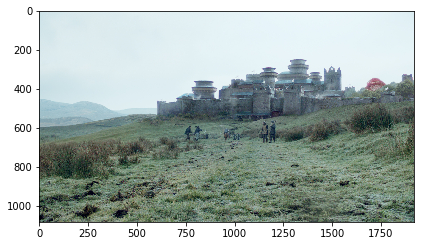

In [3]:
background = load_image("Images/back_ground.jpg")
ski.io.imshow(background)

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/home/gabriel/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]
/home/gabriel/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/gabriel/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]


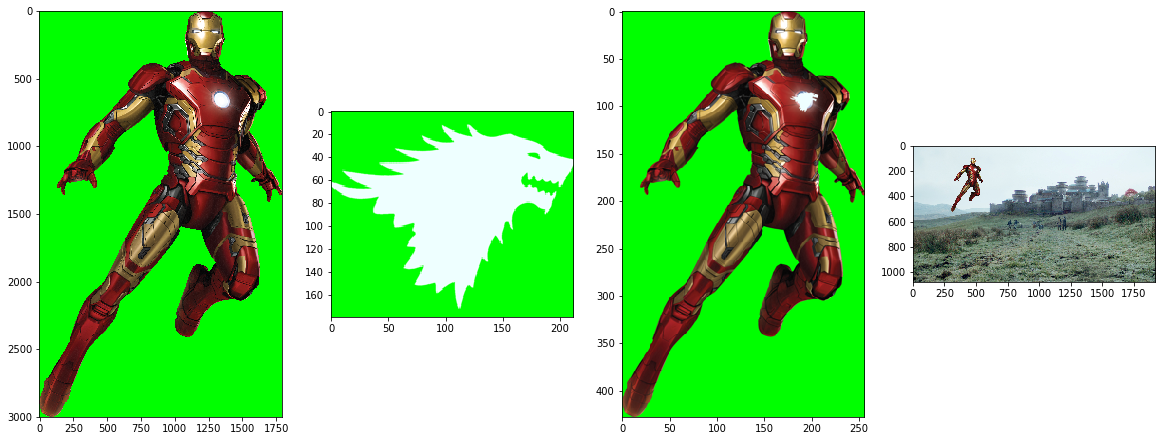

In [4]:
fig, ax = plt.subplots(1, 4)
iron_man = load_image ("Images/ironman.tif")
ax[0].imshow(iron_man)
stark_symbol =  load_image ("Images/stark_symbol.tif")
stark_symbol = rescale_image(stark_symbol, 0.23)
ax[1].imshow(stark_symbol)
iron_man = chroma_key (iron_man, stark_symbol, 580, 1240) 
iron_man = rescale_image(iron_man, 1/7)
ax[2].imshow(iron_man)
background = chroma_key (background, iron_man, 100, 300)
ax[3].imshow(background)
fig.set_size_inches(20, 10)




/home/gabriel/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:269: RuntimeWarning: divide by zero encountered in true_divide
  out_s = delta / out_v
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


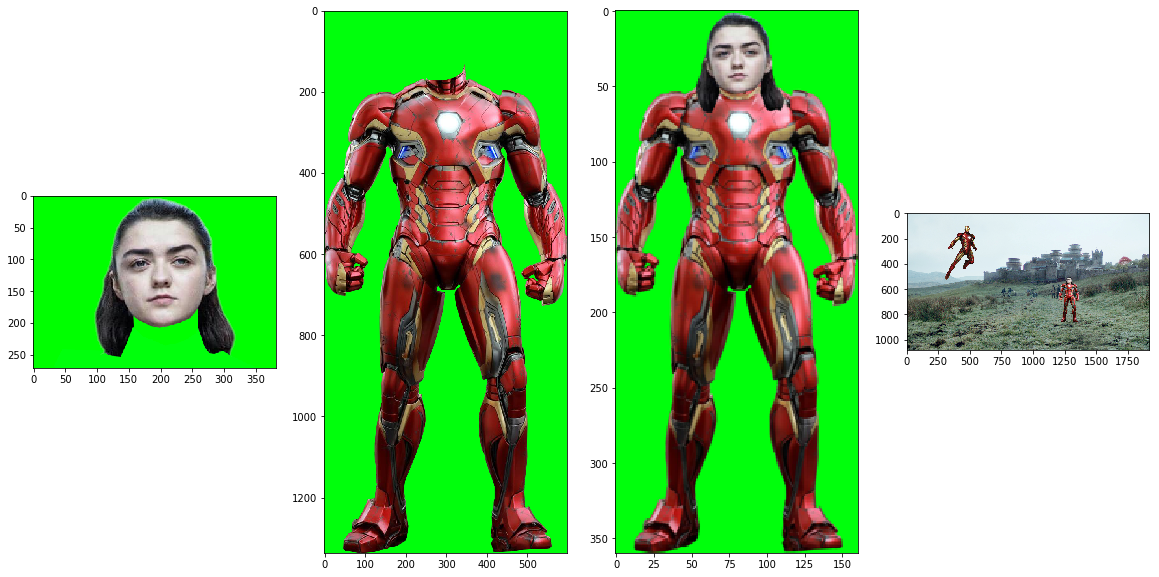

In [5]:
fig, ax = plt.subplots(1, 4)
arya_stark_head = load_image ("Images/arya_head.tif")
ax[0].imshow(arya_stark_head)
iron_man_armor = load_image("Images/ironman armor.tif")
ax[1].imshow(iron_man_armor)
arya = chroma_key(iron_man_armor, arya_stark_head, 0, 100)
arya = rescale_image(arya, 0.27)
ax[2].imshow(arya)
background = chroma_key (background, arya, 500, 1200)
ax[3].imshow(background)
fig.set_size_inches(20, 10)




/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


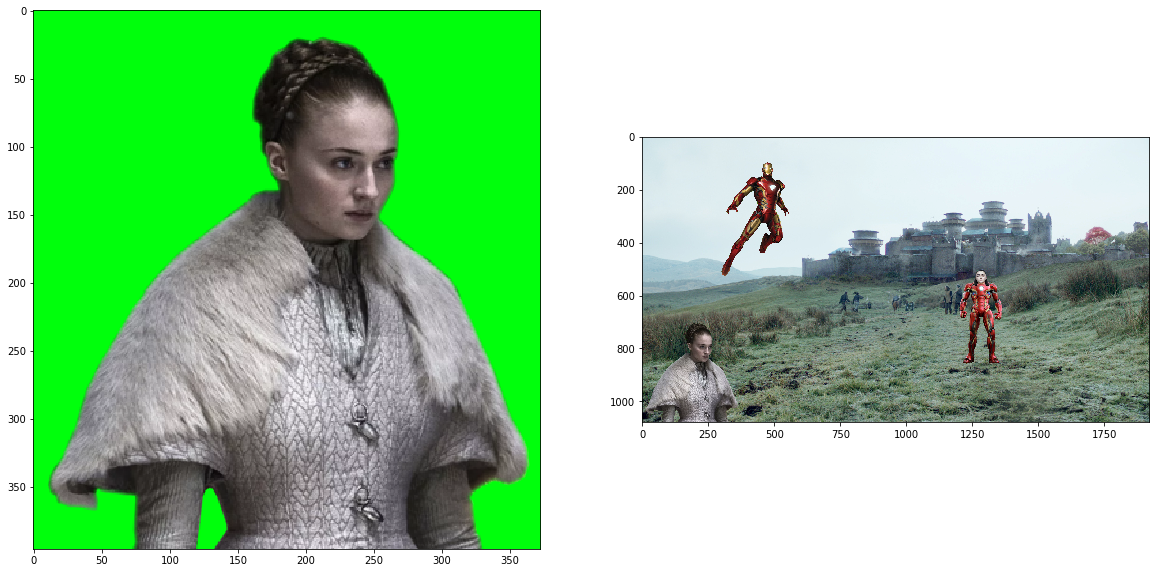

In [6]:
fig, ax = plt.subplots(1, 2)
sansa = load_image ("Images/sansa_stark.tif")
sansa = rescale_image(sansa, 0.45)
ax[0].imshow(sansa)
background = chroma_key(background, sansa, 684, 0)
ax[1].imshow(background)
fig.set_size_inches(20, 10)


In [7]:
fig, ax = plt.subplots(1, 6)
green_background = np.zeros((1311 ,894 ,3))
green_background[:,:,1] = 1
ax[0].imshow(green_background)
ned_head = load_image("Images/ned_head.tif")
ned_head = ned_head[:, ::-1]
ned_head = rescale_image (ned_head, 0.43)
ax[1].imshow(ned_head)
green_background = chroma_key(green_background, ned_head,350, 260) 
ax[2].imshow(green_background)
ned_armor = load_image("Images/ironman holding helmet.tif")
ax[3].imshow(ned_armor)
ned_armor = chroma_key(green_background, ned_armor, 0, 0) 
ax[4].imshow(ned_armor)
ned_armor = ned_armor[:, ::-1]
ned_armor = rescale_image(ned_armor, 0.35)
background = chroma_key(background, ned_armor, 425, 1640)
ax[5].imshow(background)
fig.set_size_inches(20, 10)

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


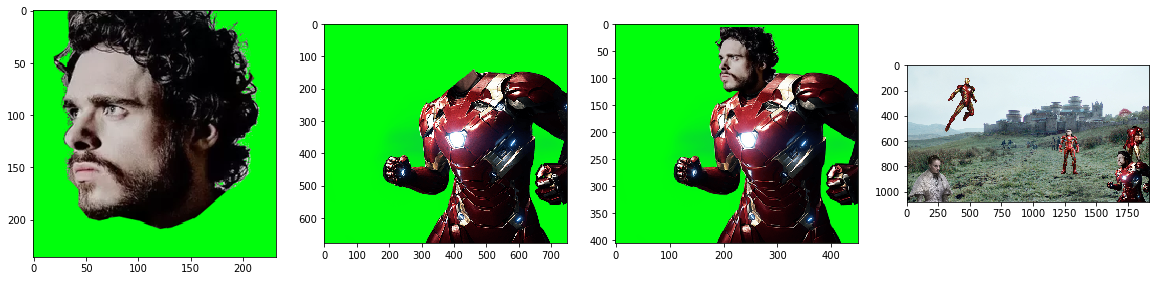

In [8]:
fig, ax = plt.subplots(1, 4)
robb_head = load_image ("Images/robb_head.tif")
robb_head = robb_head[:, ::-1]
robb_head = rescale_image(robb_head, 0.75)
ax[0].imshow(robb_head)
robb_armor = load_image("Images/tony_stark.tif")
robb_armor = robb_armor[:, ::-1]
ax[1].imshow(robb_armor)
robb_armor = chroma_key(robb_armor, robb_head, 10 , 290)
robb_armor = rescale_image(robb_armor, 0.6)
ax[2].imshow(robb_armor)
background = chroma_key(background, robb_armor,674, 1470)
ax[3].imshow(background)
fig.set_size_inches(20, 10)

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


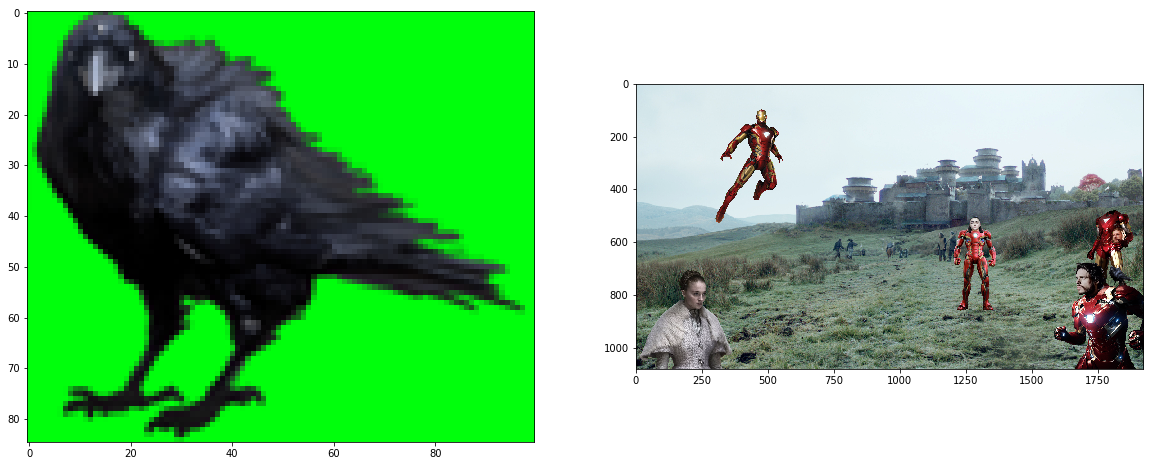

In [9]:
fig, ax = plt.subplots(1, 2)
bran_raven = load_image("Images/raven.tif")
bran_raven = rescale_image(bran_raven, 0.20)
ax[0].imshow(bran_raven)
background = chroma_key(background ,bran_raven ,690 ,1785)
ax[1].imshow(background)
fig.set_size_inches(20, 10)

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


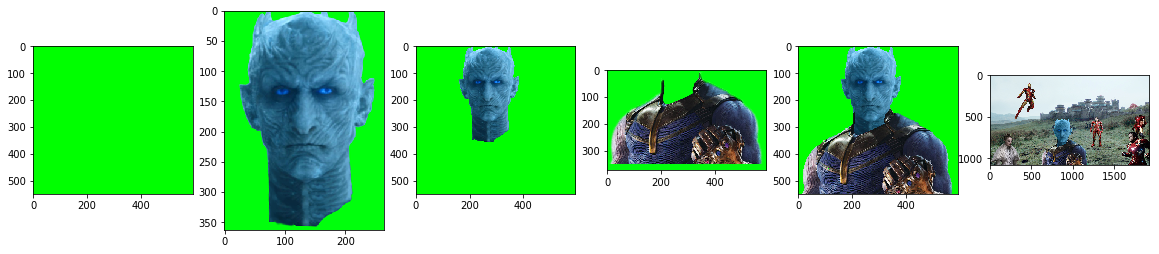

In [10]:
fig, ax = plt.subplots(1, 6)
green_background = np.zeros((551,594,3))
green_background[:,:,1] = 1
ax[0].imshow(green_background)
nk_head = load_image("Images/nk_head.tif")
nk_head = rescale_image(nk_head, 0.45)
ax[1].imshow(nk_head)
nk_head = chroma_key(green_background, nk_head, 0, 134)
ax[2].imshow(nk_head)
thanos = load_image("Images/thanos.tif")
ax[3].imshow(thanos)
nk_thanos = chroma_key(nk_head, thanos, 200, 0)
ax[4].imshow(nk_thanos)
background = chroma_key(background, nk_thanos, 529, 600)
ax[5].imshow(background)
fig.set_size_inches(20, 10)

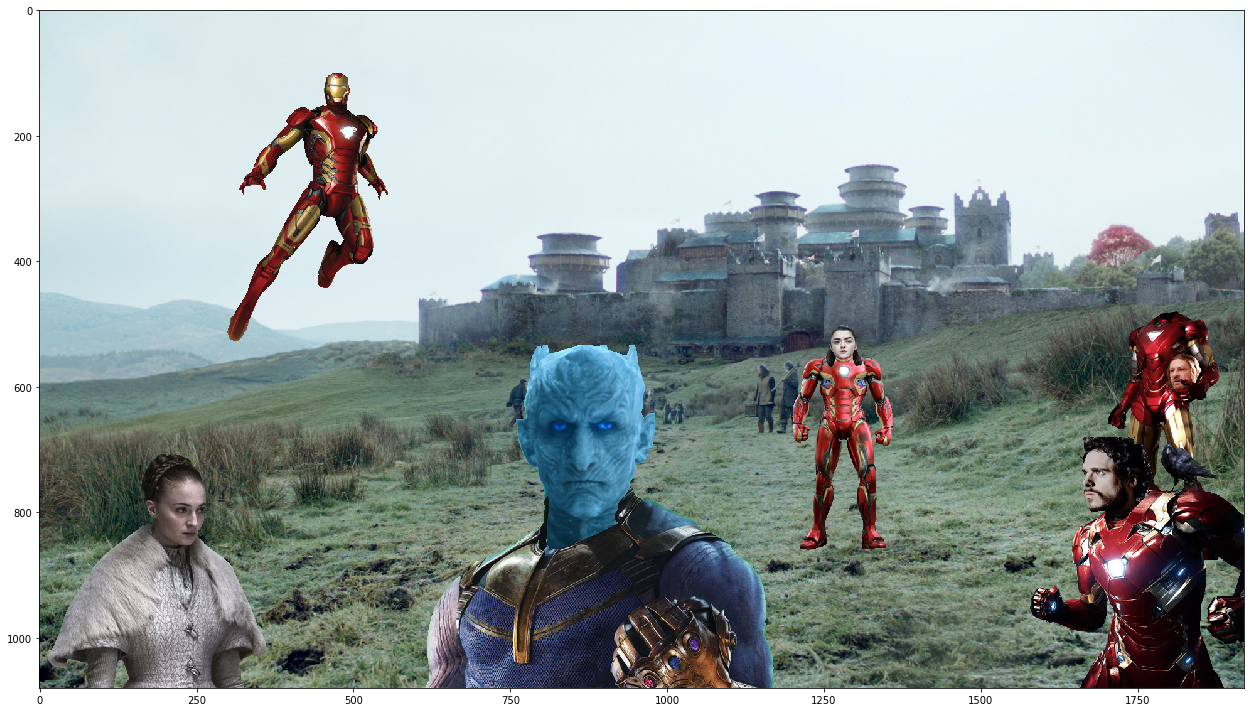

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
final_image = background
ski.io.imshow(final_image)
ski.io.imsave("final_image.tif",final_image)